<a href="https://colab.research.google.com/github/Naganadel17/private/blob/main/5%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


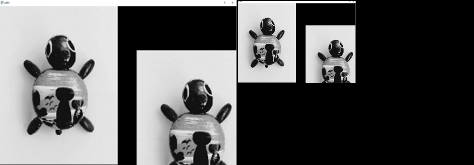

In [6]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import cv2
img_data='/content/drive/MyDrive/Colab Notebooks/image1.jpg'

from google.colab.patches import cv2_imshow

img=cv2.imread(img_data)

height, width = img.shape[:2]

scale_factor=0.5
scaling_matrix=np.array([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])
dst=np.zeros((height,width,img.shape[2]), dtype=np.uint8)

for y in range(height):
  for x in range(width):
    new_p=np.array([x,y,1])
    inv_scaling_matrix=np.linalg.inv(scaling_matrix)
    old_p=np.dot(inv_scaling_matrix,new_p)
    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)

    if x_>0 and x_ < width and y_>0 and y_ < height:
      dst[y,x]=img[y_,x_]


result = cv2.hconcat([img,dst])
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

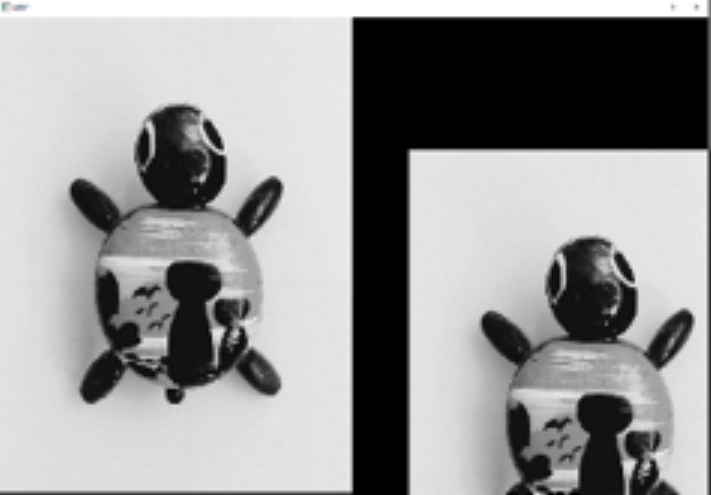

In [7]:
img_data='/content/drive/MyDrive/Colab Notebooks/image1.jpg'
image=cv2.imread(img_data)

height, width = image.shape[:2]

def bl_interpolate(img, ax=1., ay=1.):
	H, W, C = img.shape

	aH = int(ay * H)
	aW = int(ax * W)

	# get position of resized image
	y = np.arange(aH).repeat(aW).reshape(aH, -1)
	x = np.tile(np.arange(aW), (aH, 1))

	# get position of original position
	y = (y / ay)
	x = (x / ax)

	ix = np.floor(x).astype(int)
	iy = np.floor(y).astype(int)

	ix = np.minimum(ix, W-2)
	iy = np.minimum(iy, H-2)

	# get distance
	dx = x - ix
	dy = y - iy

	dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1)
	dy = np.repeat(np.expand_dims(dy, axis=-1), 3, axis=-1)

	# interpolation
	out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]

	out = np.clip(out, 0, 255)
	out = out.astype(np.uint8)

	return out;

dst=bl_interpolate(image, ax=3, ay=3)

cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

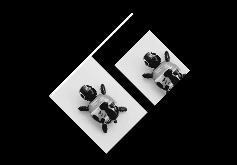

In [8]:
img_data='/content/drive/MyDrive/Colab Notebooks/image1.jpg'

from google.colab.patches import cv2_imshow

image=cv2.imread(img_data)
height, width = image.shape[:2]

scale_factor=0.5
scaling_matrix=np.array([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])
translation_matrix=np.array([[1,0,width/4],[0,1,height/4],[0,0,1]])
angle=45
radian=angle*np.pi/180

c=np.cos(radian)
s=np.sin(radian)
center_x=width/2
center_y=height/2
rotation_matrix=np.array([[c,s,(1-c)*center_x-s*center_y],[-s,c,s*center_x+(1-c)*center_y],[0,0,1]],dtype=float)

T=np.eye(3)
T=np.dot(scaling_matrix,T)
T=np.dot(translation_matrix,T)
T=np.dot(rotation_matrix,T)
dst=np.zeros((height,width,image.shape[2]), dtype=np.uint8)

for y in range(height):
  for x in range(width):
    new_p=np.array([x,y,1])
    inv_scaling_matrix=np.linalg.inv(T)
    old_p=np.dot(inv_scaling_matrix,new_p)
    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)

    if x_>0 and x_ < width and y_>0 and y_ < height:
      dst.itemset((y,x,0),image.item(y_,x_,0))
      dst.itemset((y,x,1),image.item(y_,x_,1))
      dst.itemset((y,x,2),image.item(y_,x_,2))

cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

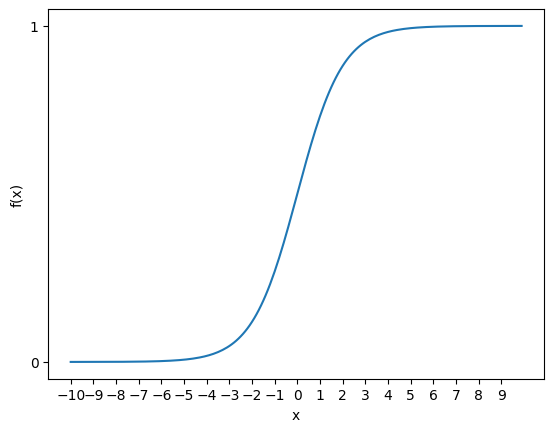

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
x=np.arange(-10,10,0.1)
f=1/(1+np.exp(-x))
ax.plot(x,f)
ax.set_xticks(range(-10,10))
ax.set_yticks(range(0,2))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

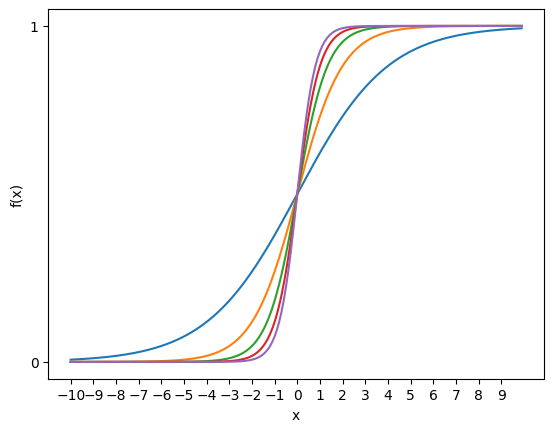

In [4]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
x=np.arange(-10,10,0.1)
W=np.arange(0.5,3,0.5)

for w in W:
  f=1/(1+np.exp(-x*w))
  ax.plot(x,f)

ax.set_xticks(range(-10,10))
ax.set_yticks(range(0,2))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

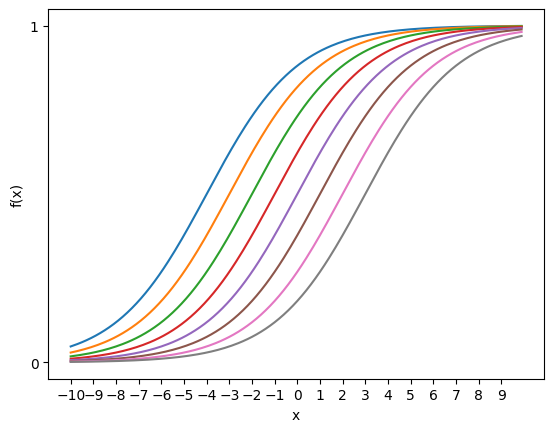

In [5]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
x=np.arange(-10,10,0.1)
w=0.5
B=np.arange(-2,2,0.5)

for b in B:
  f=1/(1+np.exp(-x*w+b))
  ax.plot(x,f)

ax.set_xticks(range(-10,10))
ax.set_yticks(range(0,2))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

In [6]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def feed_forward(x,W1,W2,b1,b2):
  a1=x
  z2=np.dot(W1,a1)+b1
  a2=sigmoid(z2)
  z3=np.dot(W2,a2)+b2
  a3=sigmoid(z3)

  return a2,a2,a3,z2,z3

node_size={'input_layer_size':3,
           'hidden_layer_size':3,
           'output_layer_size':1}

W2=np.random.random((node_size['output_layer_size'],node_size['hidden_layer_size']))
W1=np.random.random((node_size['output_layer_size'],node_size['hidden_layer_size']))
b2=np.random.random(node_size['output_layer_size'])
b1=np.random.random(node_size['hidden_layer_size'])

X=np.array([[1,0,0],[0,0,1],[0,1,1],[1,0,1],[1,1,0],[0,1,0],[1,1,1]])
Y=np.array([1,0,0,0,1,1,0])

for x,y in zip(X,Y):
  a1,a2,a3,z1,z2=feed_forward(x,W1,W2,b1,b2)
  print('a3={},y={},Error(L2 Norm)={}'.format(a3,y,np.linalg.norm((y-a3),2)))

a3=[0.67340797],y=1,Error(L2 Norm)=0.32659203453155716
a3=[0.67859873],y=0,Error(L2 Norm)=0.6785987343852211
a3=[0.68162994],y=0,Error(L2 Norm)=0.6816299364332925
a3=[0.67941225],y=0,Error(L2 Norm)=0.6794122461822358
a3=[0.67762717],y=1,Error(L2 Norm)=0.32237283448370335
a3=[0.67669685],y=1,Error(L2 Norm)=0.32330315350340866
a3=[0.68222374],y=0,Error(L2 Norm)=0.6822237398833473


0/1000,x=-10.000000,f(x)=205.000000,gradient=-0.300000,gradient sign=-
50/1000,x=-0.462545,f(x)=9.839400,gradient=-0.109251,gradient sign=-
100/1000,x=3.010707,f(x)=-16.042712,gradient=-0.039786,gradient sign=-
150/1000,x=4.275560,f(x)=-19.475186,gradient=-0.014489,gradient sign=-
200/1000,x=4.736181,f(x)=-19.930399,gradient=-0.005276,gradient sign=-
250/1000,x=4.903925,f(x)=-19.990770,gradient=-0.001921,gradient sign=-
300/1000,x=4.965012,f(x)=-19.998776,gradient=-0.000700,gradient sign=-
350/1000,x=4.987259,f(x)=-19.999838,gradient=-0.000255,gradient sign=-
400/1000,x=4.995360,f(x)=-19.999978,gradient=-0.000093,gradient sign=-
450/1000,x=4.998310,f(x)=-19.999997,gradient=-0.000034,gradient sign=-
500/1000,x=4.999385,f(x)=-20.000000,gradient=-0.000012,gradient sign=-
Mind Value of Cost Function is x=4.99950726213442.


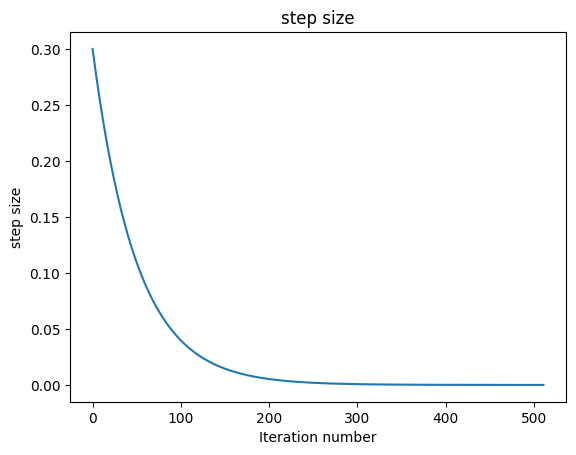

0/1000,x=10.000000,f(x)=5.000000,gradient=0.100000,gradient sign=+
50/1000,x=6.820848,f(x)=-16.684511,gradient=0.036417,gradient sign=+
100/1000,x=5.663098,f(x)=-19.560301,gradient=0.013262,gradient sign=+
150/1000,x=5.241480,f(x)=-19.941687,gradient=0.004830,gradient sign=+
200/1000,x=5.087940,f(x)=-19.992267,gradient=0.001759,gradient sign=+
250/1000,x=5.032025,f(x)=-19.998974,gradient=0.000640,gradient sign=+
300/1000,x=5.011663,f(x)=-19.999864,gradient=0.000233,gradient sign=+
350/1000,x=5.004247,f(x)=-19.999982,gradient=0.000085,gradient sign=+
400/1000,x=5.001547,f(x)=-19.999998,gradient=0.000031,gradient sign=+
450/1000,x=5.000563,f(x)=-20.000000,gradient=0.000011,gradient sign=+
Mind Value of Cost Function is x=5.000498954013208.


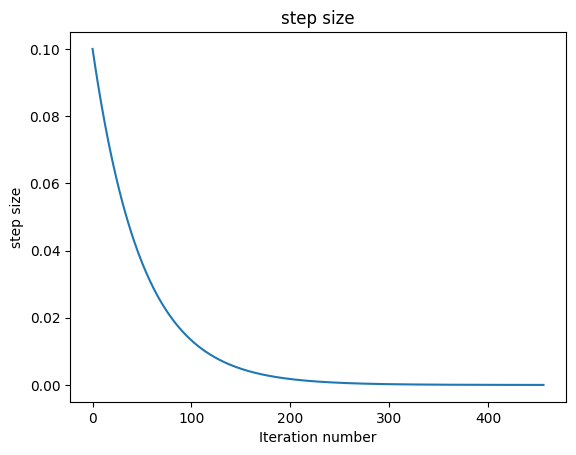

In [15]:
def f(x):
  return np.power(x-5,2)-20

def f_derivative(x):
  return 2*x-10

def gradient_descent(next_x,gamma,precision,max_iteration):
  list_step=[]
  for i in range(max_iteration):
    current_x=next_x
    next_x=current_x-gamma*f_derivative(current_x)
    step=next_x-current_x
    list_step.append(abs(step))

    if i%50==0:
      print('{}/{},x={:5.6f},'.format(i,max_iteration,current_x), end="")
      gradient=gamma*f_derivative(current_x)
      print('f(x)={:5.6f},gradient={:5.6f},'.format(f(current_x),gradient), end="")
      print('gradient sign={}'.format('+' if f_derivative(current_x)>0 else '-'))

    if abs(step)<=precision:
      break

  print('Mind Value of Cost Function is x={}.'.format(current_x))
  Figure,ax=plt.subplots(1,1)
  ax.title.set_text('step size')
  ax.plot(list_step)
  ax.set_ylabel('step size')
  ax.set_xlabel('Iteration number')
  plt.show()

gradient_descent(next_x=-10, gamma=0.01, precision=0.00001, max_iteration=1000)
gradient_descent(next_x=10, gamma=0.01, precision=0.00001, max_iteration=1000)

0/1000 cost:0.02877484021361048
100/1000 cost:0.18136070473663146
200/1000 cost:0.15781129046104478
300/1000 cost:0.15958854466861697
400/1000 cost:0.022937309092677282
500/1000 cost:0.040534721824597816
600/1000 cost:0.058458291347576456
700/1000 cost:0.009094646341365285
800/1000 cost:0.01739537876160969
900/1000 cost:0.02858903779638224
1000/1000 cost:0.05090445042564354


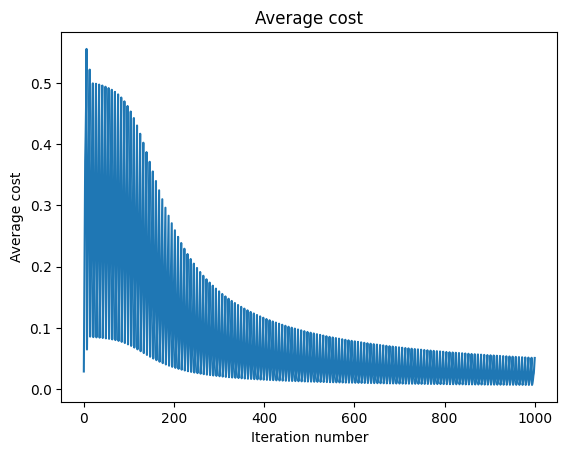

1
[0.95231081]
0
[0.02185549]
0
[0.03216711]
0
[0.05085293]
1
[0.96976087]
1
[0.92055984]
0
[0.09185839]


In [23]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))

def feed_forward(x,W1,W2,b1,b2):
  a1=x
  z2=np.dot(W1,a1)+b1
  a2=sigmoid(z2)
  z3=np.dot(W2,a2)+b2
  a3=sigmoid(z3)

  return a1,a2,a3,z2,z3

node_size={'input_layer_size':3,
          'hidden_layer_size':3,
          'output_layer_size':1}

learning_rate=2.0

W2=np.random.random((node_size['output_layer_size'],node_size['hidden_layer_size']))
W1=np.random.random((node_size['hidden_layer_size'],node_size['input_layer_size']))
b2=np.random.random(node_size['output_layer_size'])
b1=np.random.random(node_size['hidden_layer_size'])

X=np.array([[1,0,0],[0,0,1],[0,1,1],[1,0,1],[1,1,0],[0,1,0],[1,1,1]])
Y=np.array([1,0,0,0,1,1,0])

count=0
max_iteration=1000
dataset_size=len(Y)
list_average_cost=[]

while count < max_iteration:
  dW2=np.zeros((node_size['output_layer_size'],node_size['hidden_layer_size']))
  dW1=np.zeros((node_size['hidden_layer_size'],node_size['input_layer_size']))
  db2=np.zeros(node_size['output_layer_size'])
  db1=np.zeros(node_size['hidden_layer_size'])
  average_cost=0
  for x,y in zip(X,Y):
    a1,a2,a3,z2,z3=feed_forward(x,W1,W2,b1,b2)
    delta3=-(y-a3)*sigmoid_derivative(z3)
    average_cost+=np.linalg.norm((y-a3),2)/dataset_size
    delta2=np.dot(W2.T,delta3)*sigmoid_derivative(z2)

    dW2+=np.dot(delta3[:,np.newaxis],np.transpose(a2[:,np.newaxis]))/dataset_size
    db2+=delta3/dataset_size
    dW1+=np.dot(delta2[:,np.newaxis],np.transpose(a1[:,np.newaxis]))/dataset_size
    db1+=delta2/dataset_size

    W2+=-learning_rate*dW2
    b2+=-learning_rate*db2
    W1+=-learning_rate*dW1
    b1+=-learning_rate*db1

    list_average_cost.append(average_cost)
    if count%100 == 0:
      print('{}/{} cost:{}'.format(count,max_iteration,average_cost))
    count+=1

Figure,ax=plt.subplots(1,1)
ax.title.set_text('Average cost')
ax.plot(list_average_cost)
ax.set_ylabel('Average cost')
ax.set_xlabel('Iteration number')
plt.show()

for x,y in zip(X,Y):
    a1,a2,a3,z2,z3=feed_forward(x,W1,W2,b1,b2)
    print(y)
    print(a3)